In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join

# Read all results from txt files


aco_path = "./raw_files/ACO/"
aco_files = [f for f in listdir(aco_path) if isfile(join(aco_path, f))]

ga_path = "./raw_files/GA/"
ga_files = [f for f in listdir(ga_path) if isfile(join(ga_path, f))]

pso_path = "./raw_files/PSO/"
pso_files = [f for f in listdir(pso_path) if isfile(join(pso_path, f))]





# Ant Colony Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "E-factor"]
df_aco = pd.DataFrame(columns = column_names)

for file in aco_files:
    f_path = join(aco_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B","C"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    evp = float(res['B'][5]) # evaporation factor

    sup = float(res['B'][6]) # minimum support
    pat = float(res['B'][8]) # patterns
    mit = int(res['B'][9]) # maximum iteraction count
    its = res.loc[res['B'] == ' Best Cost']['C'].values # iterations
    
    if att == 98:
        col = "C2K"
    elif att == 10:
        col = "B & C"
    elif att == 9:
        col = "UCI"
    elif att == 21:
        col = "Buoys"
    else:
        col = ""
                    
    df_aco = df_aco.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "E-factor": evp}, ignore_index=True)


    
    
# -------------------------------------------------------------------------------------
# Genetic Algorithm - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "N-pop", "PC"]
df_ga = pd.DataFrame(columns = column_names)

for file in ga_files:
    f_path = join(ga_path,file)
    res = pd.read_csv(f_path, names=["A","B","C"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    pop = float(res['B'][5]) # population size
    pc = float(res['B'][6]) # population size


    sup = float(res['B'][7]) # minimum support
    pat = float(res['B'][9]) # patterns
    mit = int(res['B'][10]) # maximum iteraction count
    its = res.loc[res['B'] == ' Best Cost']['C'].values # iterations
    
    if att == 98:
        col = "C2K"
    elif att == 10:
        col = "B & C"
    elif att == 9:
        col = "UCI"
    elif att == 21:
        col = "Buoys"
    else:
        col = ""
        
    df_ga = df_ga.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "N-pop": pop, "PC": pc}, ignore_index=True)



# -------------------------------------------------------------------------------------
# Particle Swarm Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "N-particle", "Velocity", "C1", "C2"]
df_pso = pd.DataFrame(columns = column_names)

for file in pso_files:
    f_path = join(pso_path,file)
    res = pd.read_csv(f_path, names=["A","B","C"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    vel = float(res['B'][5]) # velocity
    c1 = float(res['B'][6]) # personal coefficient
    c2 = float(res['B'][7]) # global coefficient
    npat = float(res['B'][8]) # particle count

    sup = float(res['B'][9]) # minimum support
    pat = float(res['B'][11]) # patterns
    mit = int(res['B'][12]) # maximum iteraction count
    its = res.loc[res['B'] == ' Best Position']['C'].values # iterations
    
    if att == 98:
        col = "C2K"
    elif att == 10:
        col = "B & C"
    elif att == 9:
        col = "UCI"
    elif att == 21:
        col = "Buoys"
    else:
        col = ""
        
    df_pso = df_pso.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "N-particle": npat, "Velocity": vel, "C1": c1, "C2": c2}, ignore_index=True)


    

In [2]:
df_aco1 = df_aco[['Data-set', 'Algorithm', 'Pattern-count', 'Run-time', 'Memory', 'E-factor']]
df_aco1 = df_aco1.groupby(["Algorithm", "E-factor", "Data-set"]).describe(percentiles=[])
df_aco1

Pattern-count                        \
                                             count       mean        std   
Algorithm          E-factor Data-set                                       
 ACO-GRAANK (v4.0) 0.1      B & C              3.0  20.000000   4.000000   
                            Buoys              3.0  56.333333   9.814955   
                            C2K                3.0  44.666667   7.767453   
                            UCI                3.0   4.333333   1.527525   
                   0.3      B & C              2.0  18.000000   4.242641   
                            Buoys              3.0  59.333333   4.618802   
                            C2K                2.0  41.000000  16.970563   
                            UCI                3.0   4.666667   0.577350   
                   0.5      B & C              3.0  20.333333   0.577350   
                            Buoys              3.0  59.333333   1.154701   
                            C2K                3.0  26.666667   8.144528   
                            UCI                3.0   2.333333   0.577350   

                                                       Run-time              \
                                       min   50%   max    count        mean   
Algorithm          E-factor Data-set                                          
 ACO-GRAANK (v4.0) 0.1      B & C     16.0  20.0  24.0      3.0    4.076000   
                            Buoys     45.0  62.0  62.0      3.0  295.300000   
                            C2K       36.0  47.0  51.0      3.0  659.866667   
                            UCI        3.0   4.0   6.0      3.0  153.500000   
                   0.3      B & C     15.0  18.0  21.0      2.0    3.509500   
                            Buoys     54.0  62.0  62.0      3.0  243.000000   
                            C2K       29.0  41.0  53.0      2.0  755.850000   
                            UCI        4.0   5.0   5.0      3.0  143.500000   
                   0.5      B & C     20.0  20.0  21.0      3.0    3.549667   
                            Buoys     58.0  60.0  60.0      3.0  240.833333   
                            C2K       21.0  23.0  36.0      3.0  625.766667   
                            UCI        2.0   2.0   3.0      3.0  122.600000   

                                                                             \
                                            std      min       50%      max   
Algorithm          E-factor Data-set                                          
 ACO-GRAANK (v4.0) 0.1      B & C      0.480516    3.656    3.9720    4.600   
                            Buoys      6.963476  288.100  295.8000  302.000   
                            C2K       37.497511  625.100  654.9000  699.600   
                            UCI       14.459599  137.300  158.1000  165.100   
                   0.3      B & C      0.229810    3.347    3.5095    3.672   
                            Buoys      6.939741  238.600  239.4000  251.000   
                            C2K        0.212132  755.700  755.8500  756.000   
                            UCI       20.344778  121.000  148.9000  160.600   
                   0.5      B & C      0.558660    2.927    3.7150    4.007   
                            Buoys      4.936936  236.700  239.5000  246.300   
                            C2K       17.387448  614.600  616.9000  645.800   
                            UCI       11.601293  111.100  122.4000  134.300   

                                     Memory                               \
                                      count        mean       std    min   
Algorithm          E-factor Data-set                                       
 ACO-GRAANK (v4.0) 0.1      B & C       3.0  204.666667  0.577350  204.0   
                            Buoys       3.0  226.666667  0.577350  226.0   
                            C2K         3.0  291.666667  0.577350  291.0   
                            UCI         3.0  145.333333  2.081666  1

In [3]:
df_ga1 = df_ga[['Data-set', 'Algorithm', 'Pattern-count', 'Run-time', 'Memory', 'N-pop']]
df_ga1 = df_ga1.groupby(["Algorithm", "N-pop", "Data-set"]).describe(percentiles=[])
df_ga1

Pattern-count                                \
                                         count      mean       std  min  50%   
Algorithm         N-pop Data-set                                               
 GA-GRAANK (v1.0) 3.0   B & C              3.0  2.666667  1.154701  2.0  2.0   
                        Buoys              3.0  3.666667  1.527525  2.0  4.0   
                        C2K                3.0  1.666667  0.577350  1.0  2.0   
                        UCI                3.0  1.333333  0.577350  1.0  1.0   
                  5.0   B & C              3.0  2.000000  1.000000  1.0  2.0   
                        Buoys              3.0  2.666667  1.154701  2.0  2.0   
                        C2K                3.0  1.666667  0.577350  1.0  2.0   
                        UCI                3.0  1.333333  0.577350  1.0  1.0   
                  10.0  B & C              3.0  1.333333  0.577350  1.0  1.0   
                        Buoys              3.0  2.333333  0.577350  2.0  2.0   
                        C2K                3.0  1.333333  0.577350  1.0  1.0   
                        UCI                3.0  1.000000  0.000000  1.0  1.0   

                                      Run-time                            \
                                  max    count         mean          std   
Algorithm         N-pop Data-set                                           
 GA-GRAANK (v1.0) 3.0   B & C     4.0      3.0     0.523667     0.062963   
                        Buoys     5.0      3.0   378.733333    25.882877   
                        C2K       2.0      3.0   854.900000    87.572656   
                        UCI       2.0      3.0  1551.333333   403.685934   
                  5.0   B & C     3.0      3.0     0.577667     0.038940   
                        Buoys     4.0      3.0   448.100000    90.023164   
                        C2K       2.0      3.0   926.833333    94.300707   
                        UCI       2.0      3.0  1276.000000    92.698436   
                  10.0  B & C     2.0      3.0     1.678333     0.236145   
                        Buoys     3.0      3.0  1743.333333   114.369285   
                        C2K       2.0      3.0  2450.000000   274.020072   
                        UCI       1.0      3.0  5023.666667  1426.809845   

                                                               Memory  \
                                       min       50%       max  count   
Algorithm         N-pop Data-set                                        
 GA-GRAANK (v1.0) 3.0   B & C        0.468     0.511     0.592    3.0   
                        Buoys      356.400   372.700   407.100    3.0   
                        C2K        766.200   857.200   941.300    3.0   
                        UCI       1103.000  1665.000  1886.000    3.0   
                  5.0   B & C        0.549     0.562     0.622    3.0   
                        Buoys      362.800   439.300   542.200    3.0   
                        C2K        838.300   916.200  1026.000    3.0   
                        UCI       1187.000  1269.000  1372.000    3.0   
                  10.0  B & C        1.426     1.715     1.894    3.0   
                        Buoys     1612.000  1797.000  1821.000    3.0   
                        C2K       2153.000  2504.000  2693.000    3.0   
                        UCI       3580.000  5058.000  6433.000    3.0   

                                                                             
                                        mean       std    min    50%    max  
Algorithm         N-pop Data-set                                             
 GA-GRAANK (v1.0) 3.0   B & C      96.033333  0.577350   95.7   95.7   96.7  
                        Buoys     116.000000  2.645751  114.0  115.0  119.0  
                        C2K       124.333333  2.081666  122.0  125.0  126.0  
                        UCI       106.333333  0.577350  106.0  106.0  107.0  
                  5.0   B & C      96.433333  0.9

In [4]:
df_pso1 = df_pso[['Data-set', 'Algorithm', 'Pattern-count', 'Run-time', 'Memory', 'N-particle', 'C1', 'C2']]
df_pso1 = df_pso1.groupby(["Algorithm", "N-particle", "C1", "C2", "Data-set"]).describe(percentiles=[])
df_pso1

Pattern-count            \
                                                       count      mean   
Algorithm          N-particle C1  C2  Data-set                           
 PSO-GRAANK (v1.0) 5.0        0.5 0.1 B & C              3.0  1.333333   
                                      Buoys              3.0  1.333333   
                                      C2K                3.0  1.666667   
                                      UCI                3.0  1.000000   
                                  0.3 B & C              3.0  1.000000   
                                      Buoys              3.0  1.666667   
                                      C2K                3.0  1.000000   
                                      UCI                3.0  1.000000   

                                                                         \
                                                     std  min  50%  max   
Algorithm          N-particle C1  C2  Data-set                            
 PSO-GRAANK (v1.0) 5.0        0.5 0.1 B & C     0.577350  1.0  1.0  2.0   
                                      Buoys     0.577350  1.0  1.0  2.0   
                                      C2K       1.154701  1.0  1.0  3.0   
                                      UCI       0.000000  1.0  1.0  1.0   
                                  0.3 B & C     0.000000  1.0  1.0  1.0   
                                      Buoys     0.577350  1.0  2.0  2.0   
                                      C2K       0.000000  1.0  1.0  1.0   
                                      UCI       0.000000  1.0  1.0  1.0   

                                               Run-time               \
                                                  count         mean   
Algorithm          N-particle C1  C2  Data-set                         
 PSO-GRAANK (v1.0) 5.0        0.5 0.1 B & C         3.0     0.618333   
                                      Buoys         3.0   416.600000   
                                      C2K           3.0  1196.000000   
                                      UCI           3.0  2568.666667   
                                  0.3 B & C         3.0     0.629667   
                                      Buoys         3.0   558.633333   
                                      C2K           3.0  1232.333333   
                                      UCI           3.0  2078.666667   

                                                                      \
                                                       std       min   
Algorithm          N-particle C1  C2  Data-set                         
 PSO-GRAANK (v1.0) 5.0        0.5 0.1 B & C       0.174386     0.417   
                                      Buoys     123.673320   273.800   
                                      C2K       162.840413  1008.000   
                                      UCI       531.138714  2197.000   
                                  0.3 B & C       0.160382     0.503   
                                      Buoys     120.573726   423.800   
                                      C2K       195.100829  1029.000   
                                      UCI       924.502749  1030.000   

                                                                   Memory  \
                                                     50%       max  count   
Algorithm          N-particle C1  C2  Data-set                              
 PSO-GRAANK (v1.0) 5.0        0.5 0.1 B & C        0.716     0.722    3.0   
                                      Buoys      486.900   489.100    3.0   
                                      C2K       1287.000  1293.000    3.0   
                                      UCI       2332.000  3177.000    3.0   
                                  0.3 B & C        0.576     0.810    3.0   
                                      Buoys      596.000   656.100    3.0   
                                      C2K       1250.000  1418.000    3.0   
                                      UCI       24

In [5]:
#df_gra1 = df_graank[['Data-set', 'Algorithm', 'Pattern-count', 'Run-time', 'Memory']]
#df_gra1 = df_gra1.groupby(["Algorithm", "Data-set"]).describe(percentiles=[])
#df_gra1

#df_aco1 = df_aco[['Data-set', 'Algorithm', 'Pattern-count', 'Max-iteration', 'Iterations', 'E-factor']]

#df = df_aco1.groupby(["Algorithm", "E-factor", "Data-set"]).describe()
#df2 = pd.concat([df.min(), df.mean(), df.max(), df.std()], keys=['min', 'mean', 'max', 'std'], axis=1)
#df2.filter(like="Run-time")
#df2.columns = df2.columns.swaplevel(0, 1)
#df2.sort_index(axis=1, level=0, inplace=True, ascending=False)
#df.round(3)

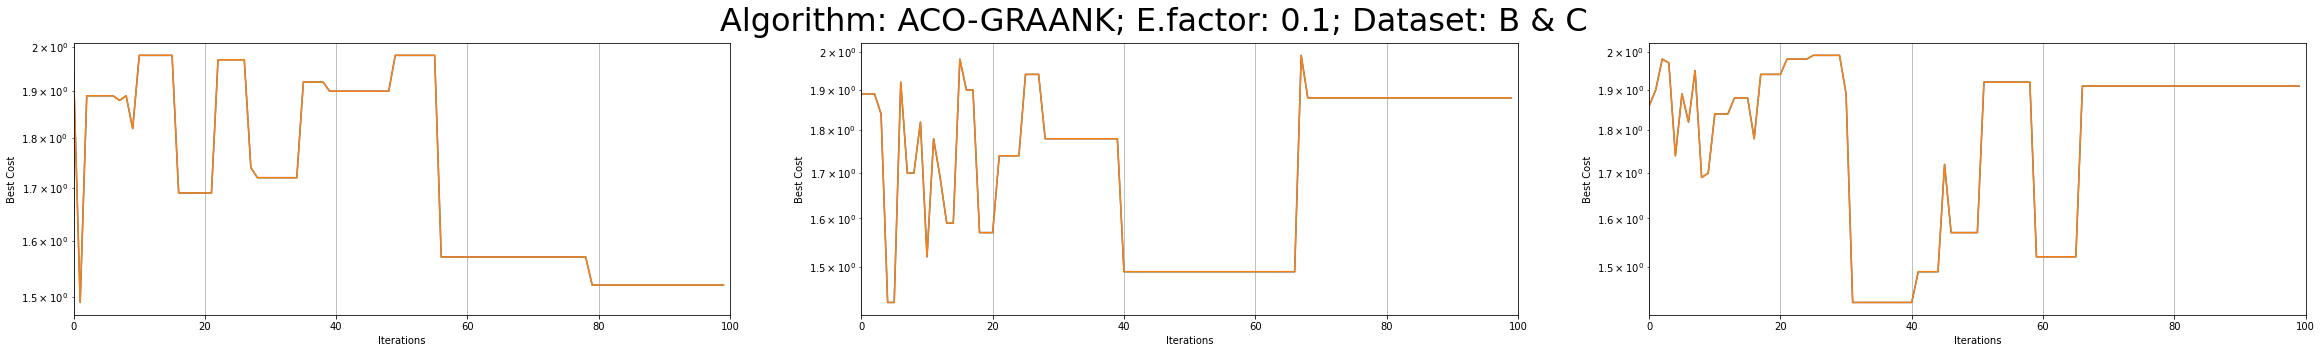

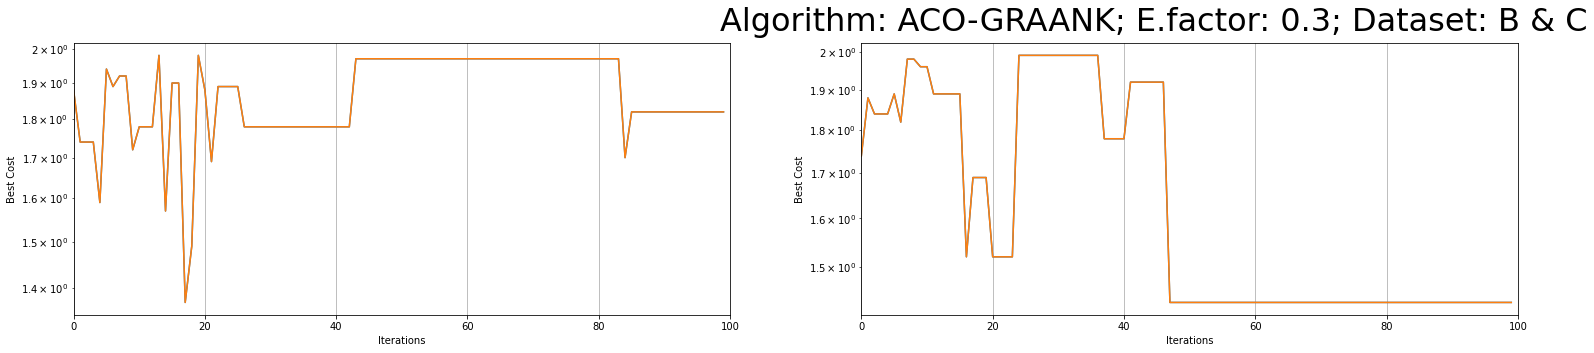

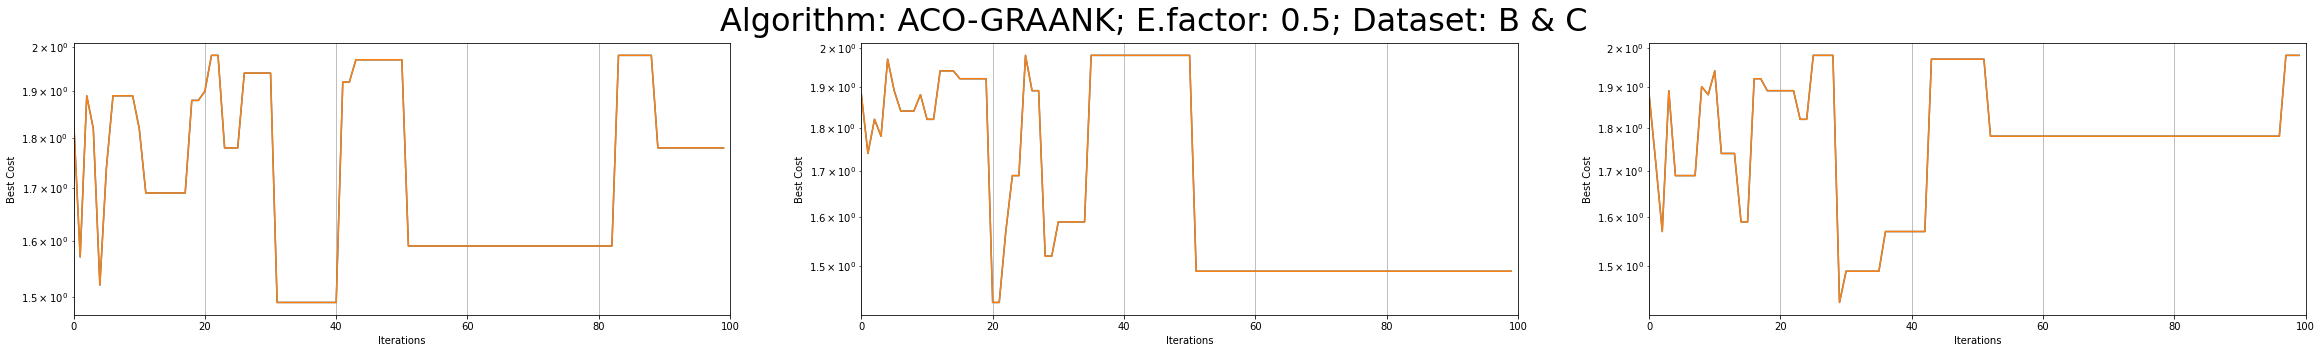

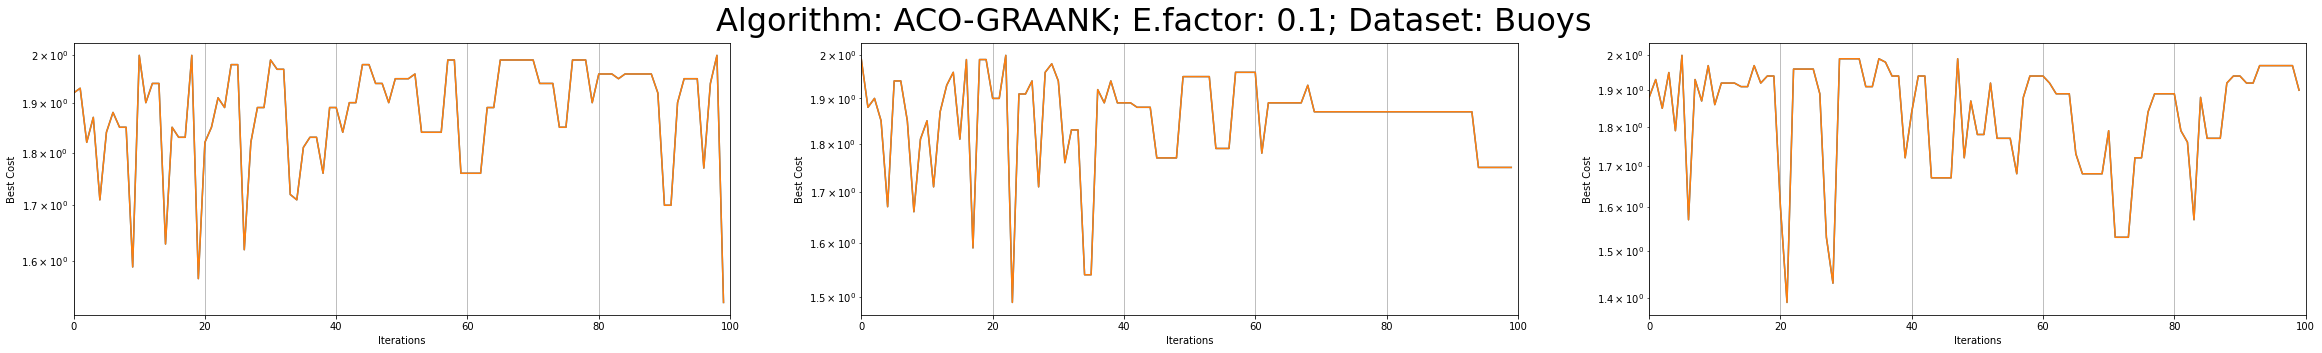

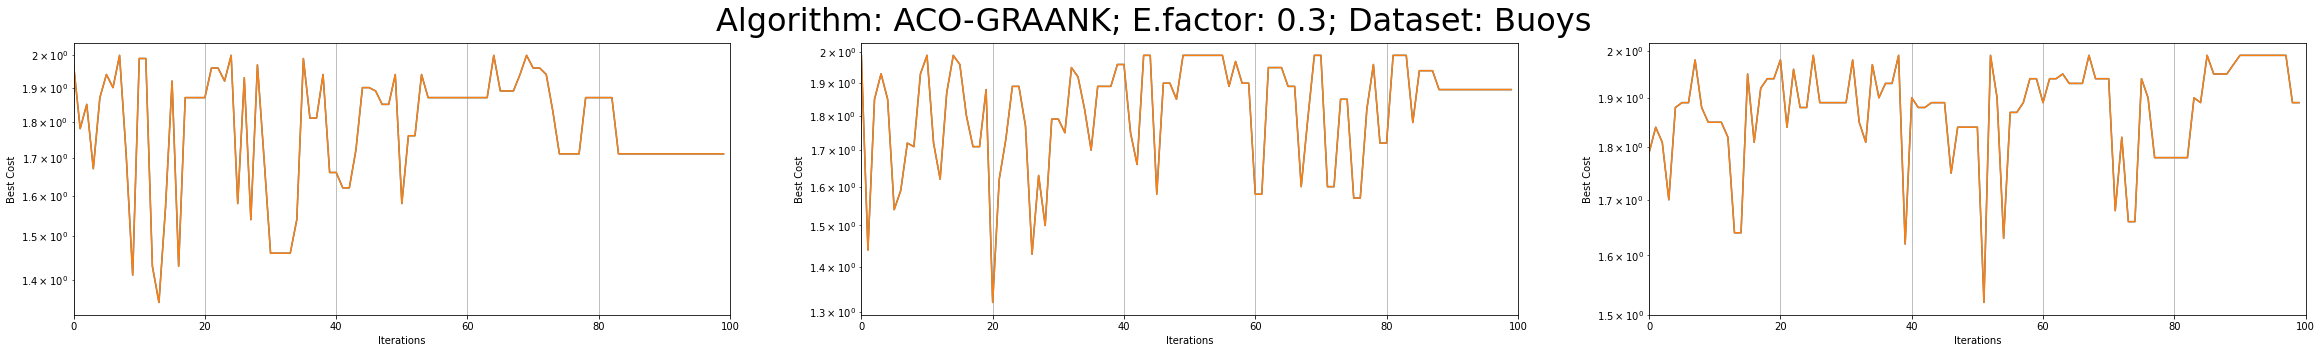

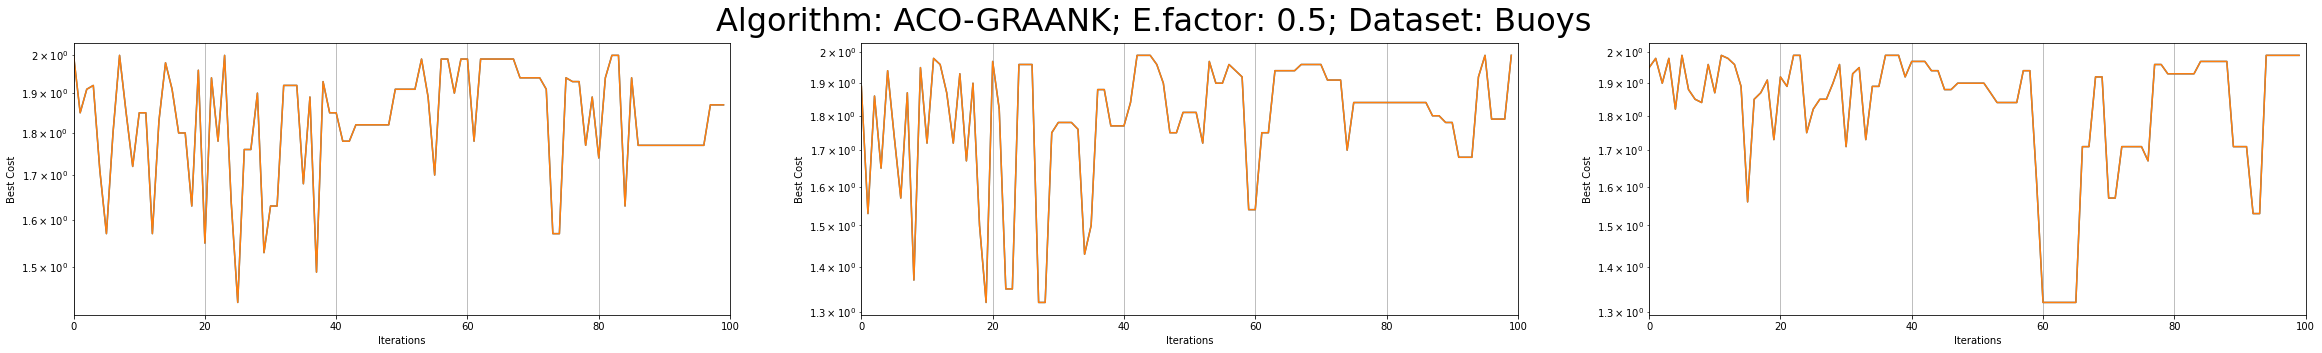

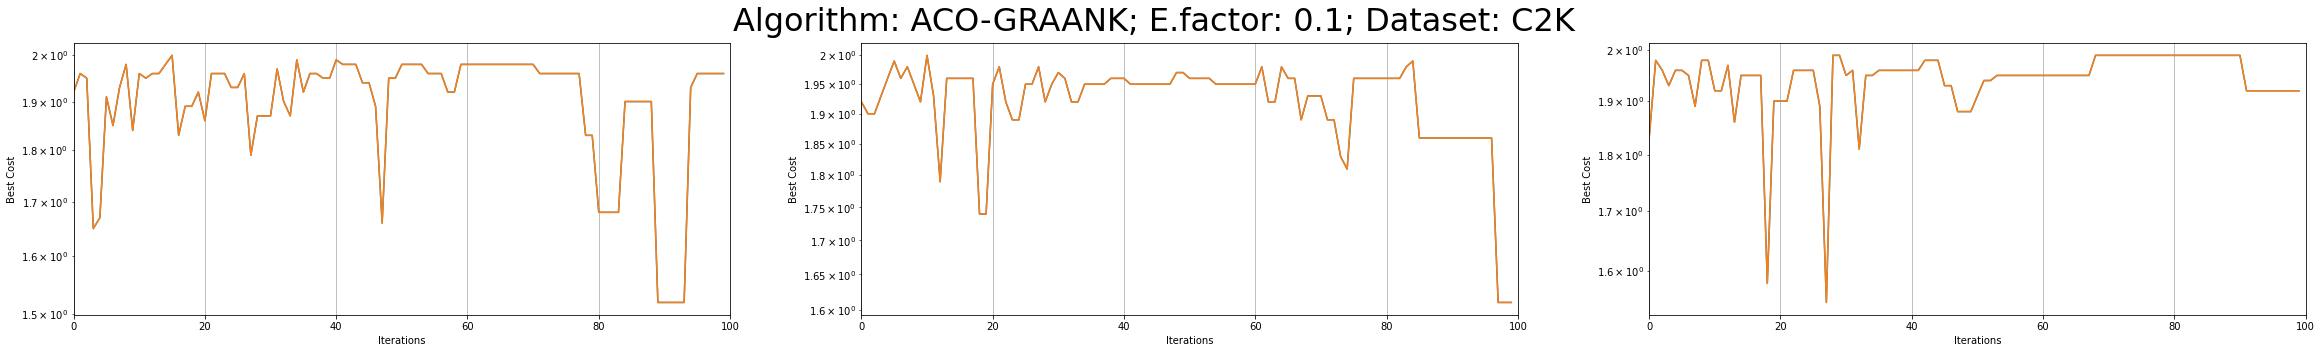

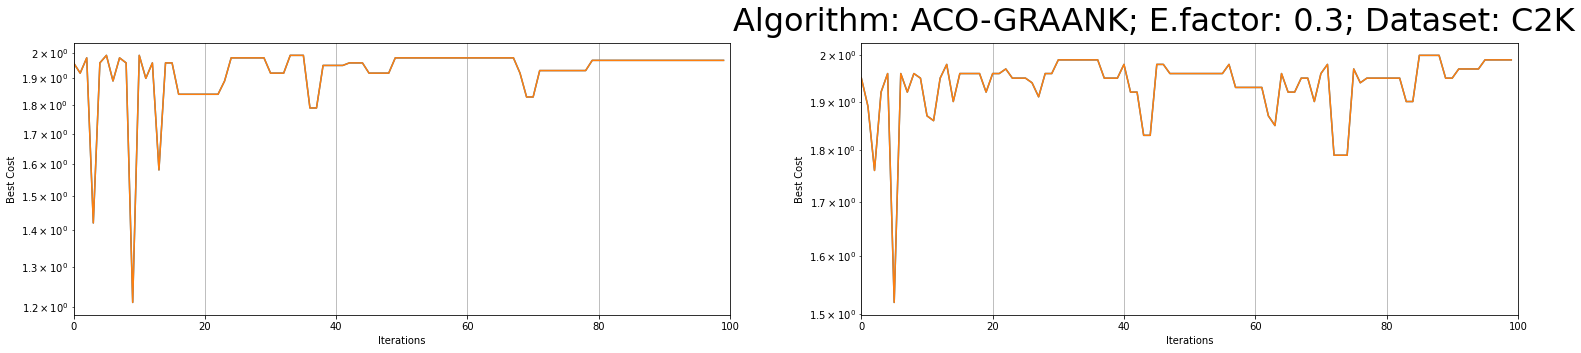

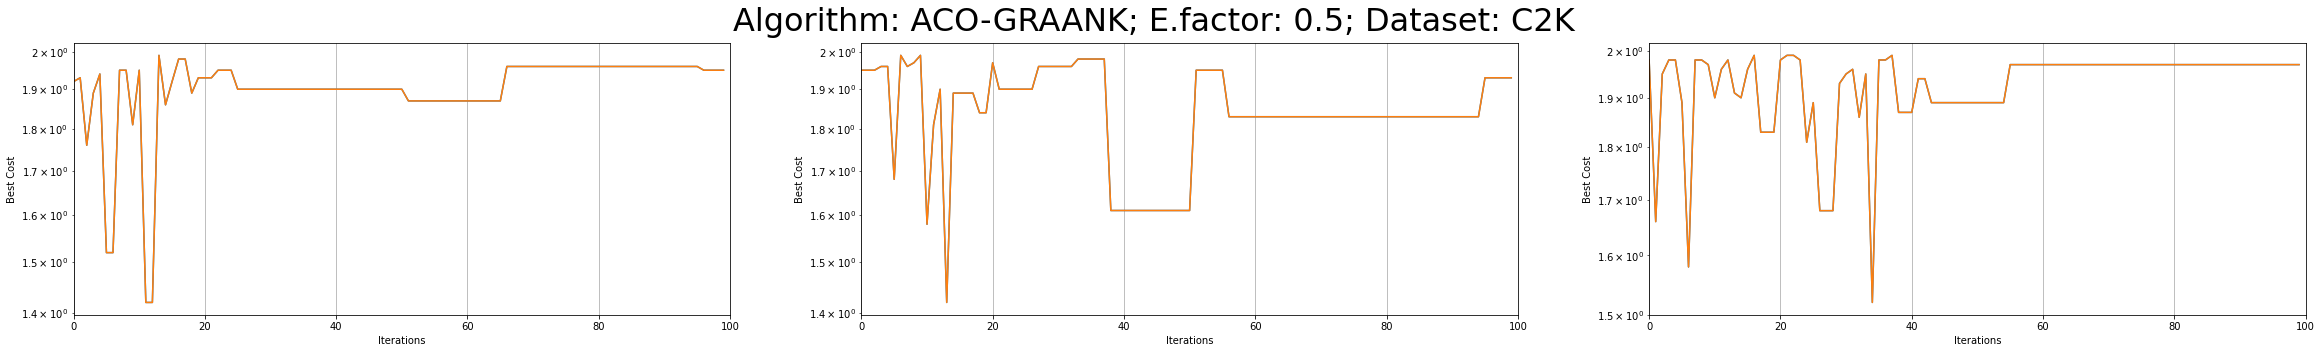

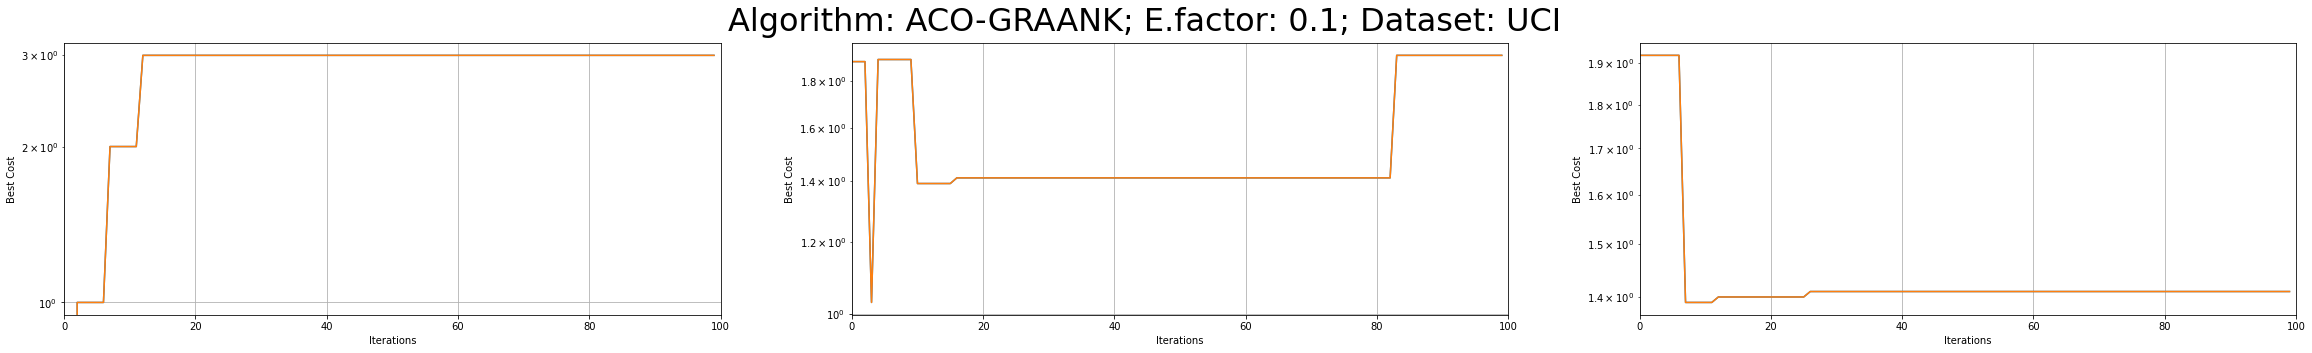

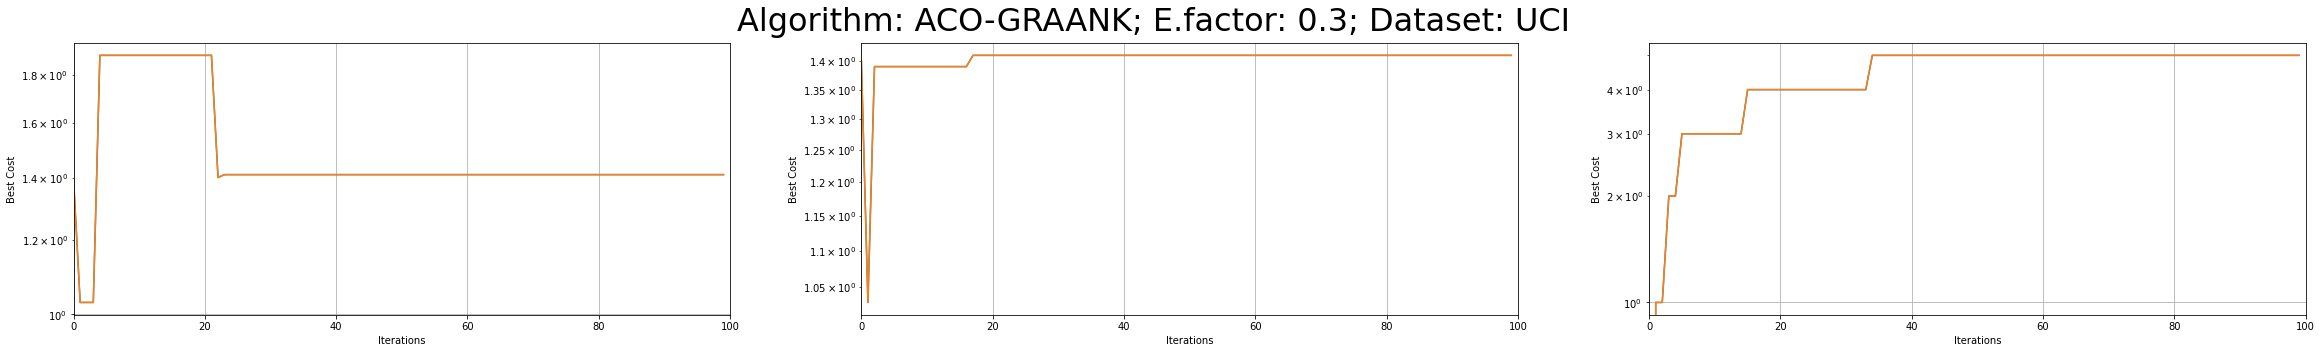

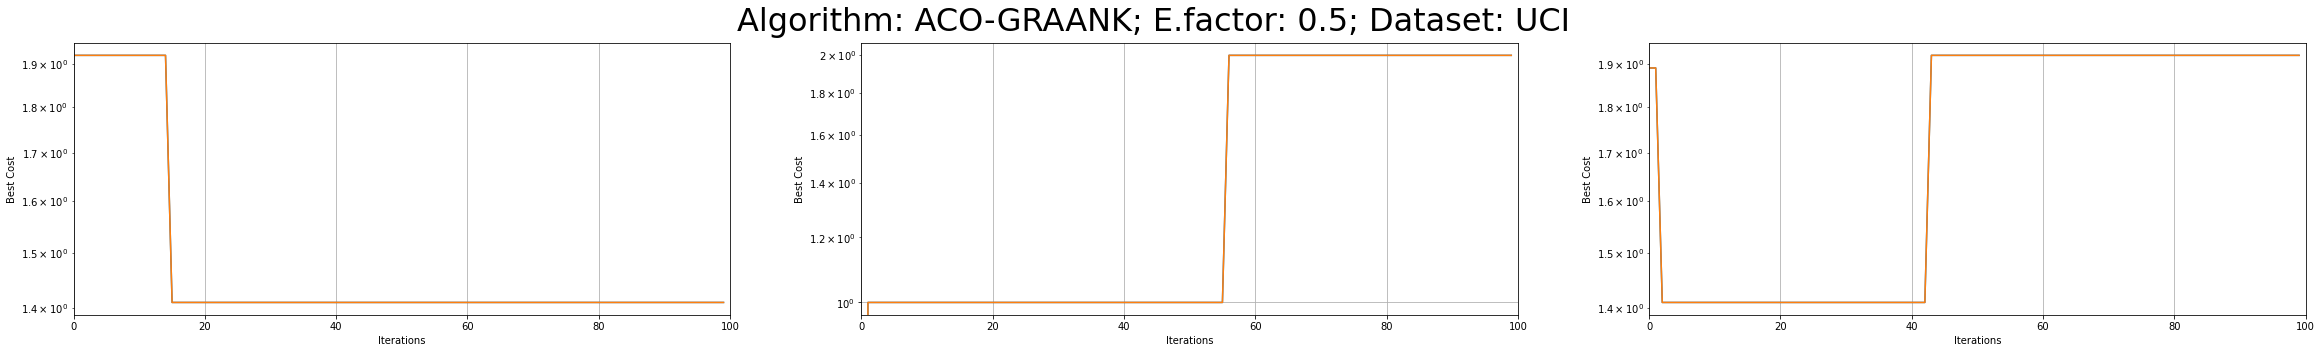

In [6]:
import matplotlib.pyplot as plt

data_sets = ['B & C', 'Buoys', 'C2K', 'UCI']
for ds in data_sets:
    df1 = df_aco.loc[df_aco['Data-set'] == ds]
    
    e_fs = [0.1, 0.3, 0.5, 0.7, 0.9]
    e_fs = [0.1, 0.3, 0.5]  # TO BE REMOVED
    
    for e in e_fs:
        df2 = df1.loc[df1['E-factor'] == e]
    
        fig = plt.figure(figsize=(40,5))
        #fig = plt.figure()
        #axes = fig.subplots(nrows=1, ncols=4)
        i = 1
        for index,row in df2.iterrows():
            # Results
            plt.subplot(1, 3, i)
            plt.plot(row['Iterations'])
            plt.semilogy(row['Iterations'])
            plt.xlim(0, row['Max-iteration'])
            plt.xlabel('Iterations')
            plt.ylabel('Best Cost')
            #plt.title('ACO, Dataset: ' + ds)
            plt.grid(True)
            i += 1

        fig.suptitle('Algorithm: ACO-GRAANK; E.factor: ' + str(e) + '; Dataset: ' + ds, fontsize=32)
        plt.show()

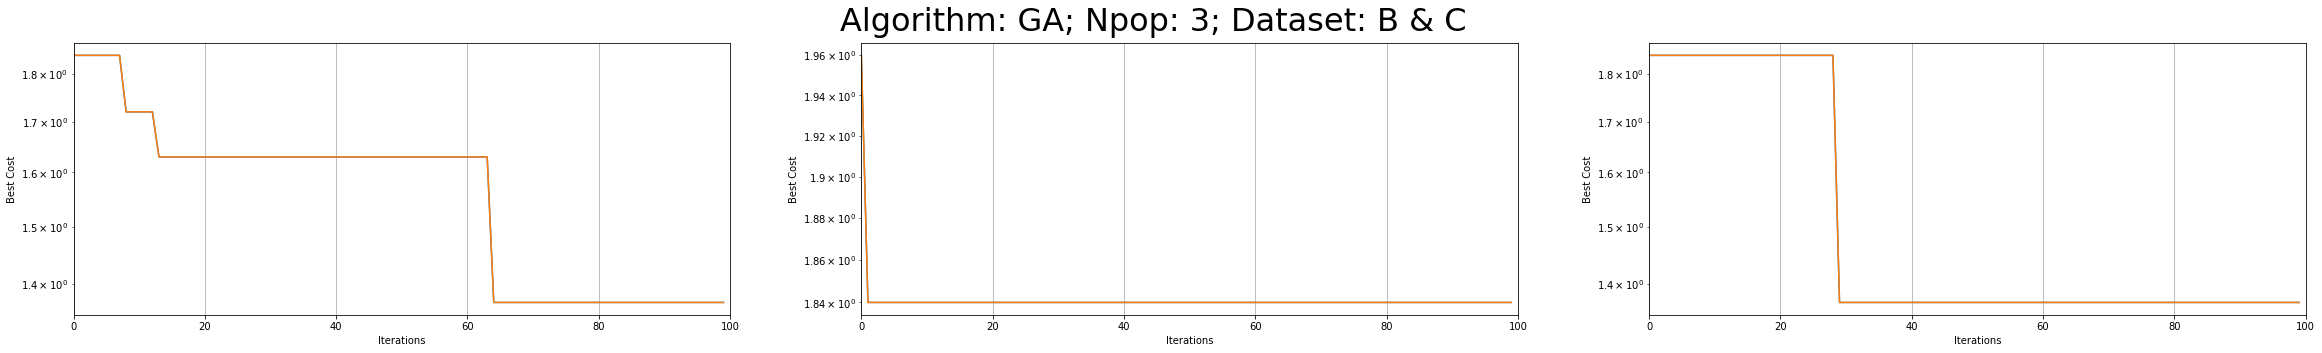

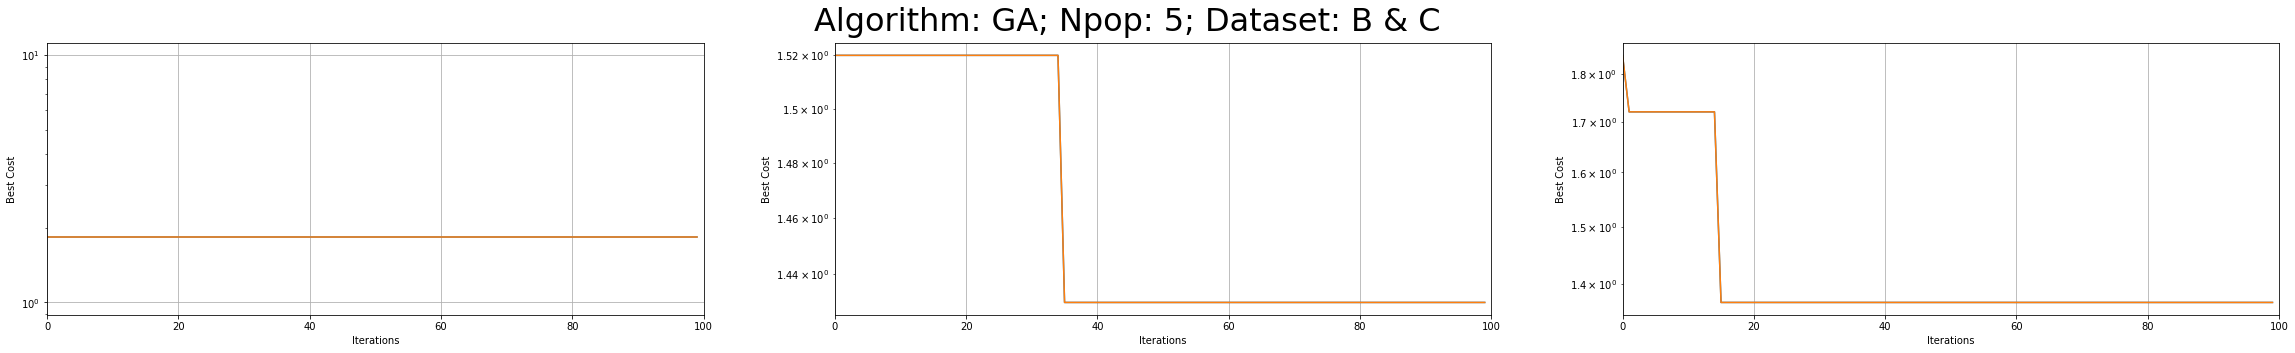

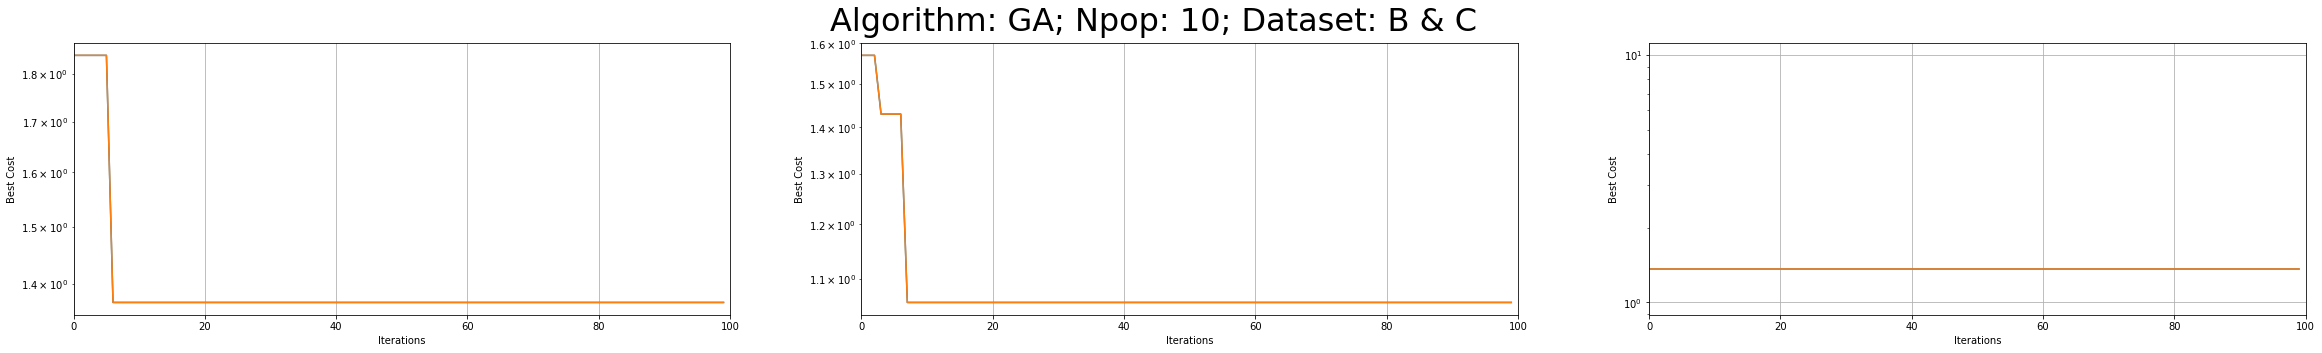

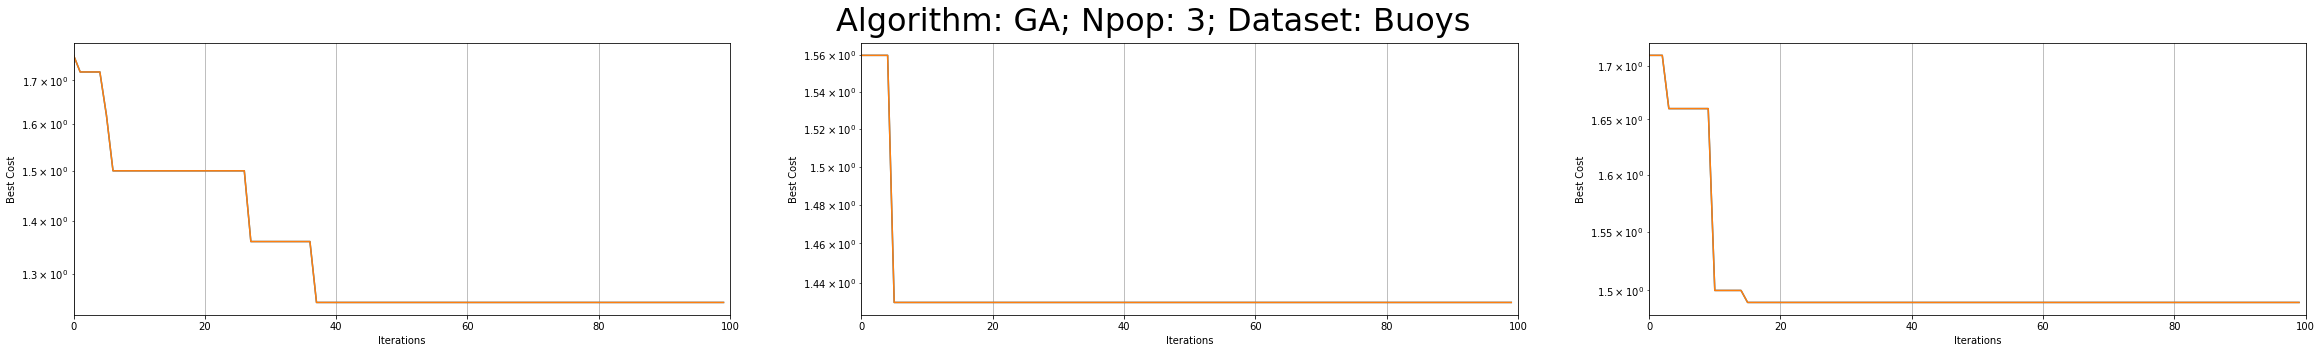

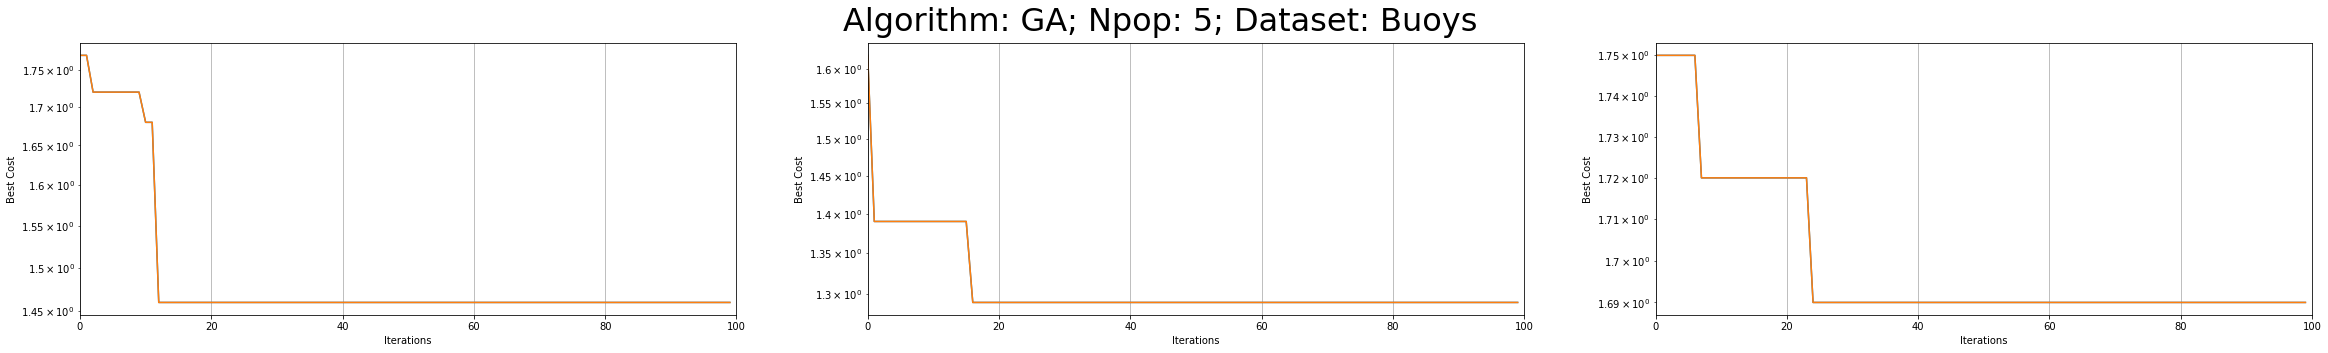

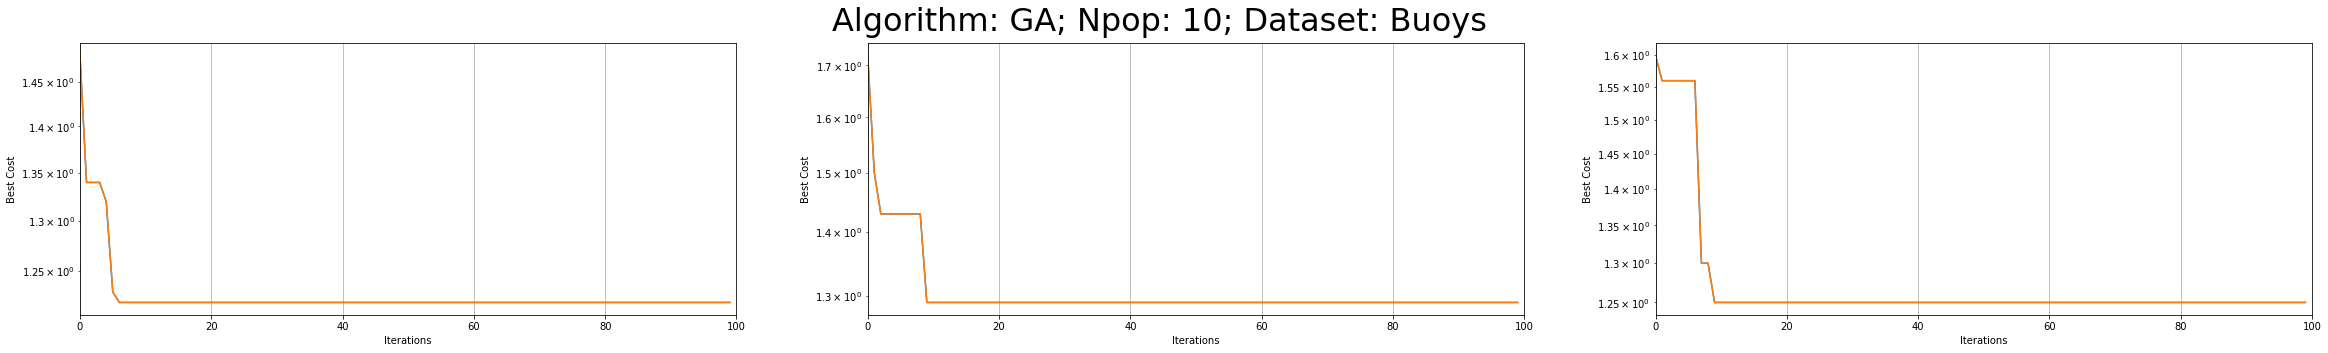

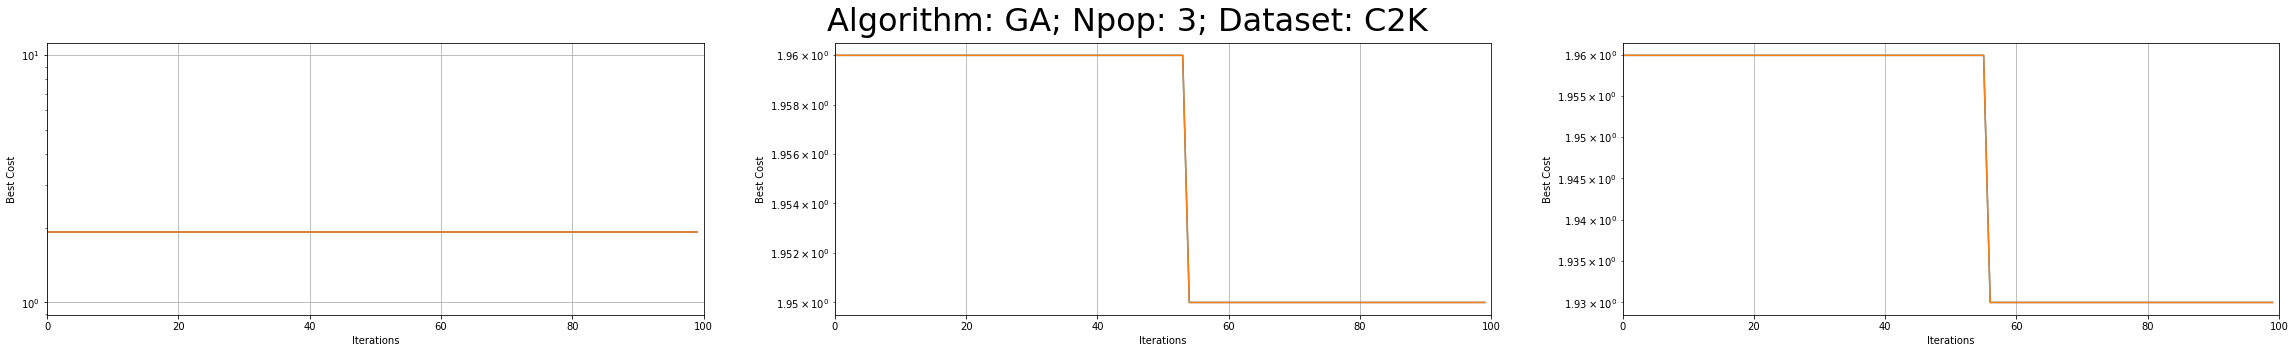

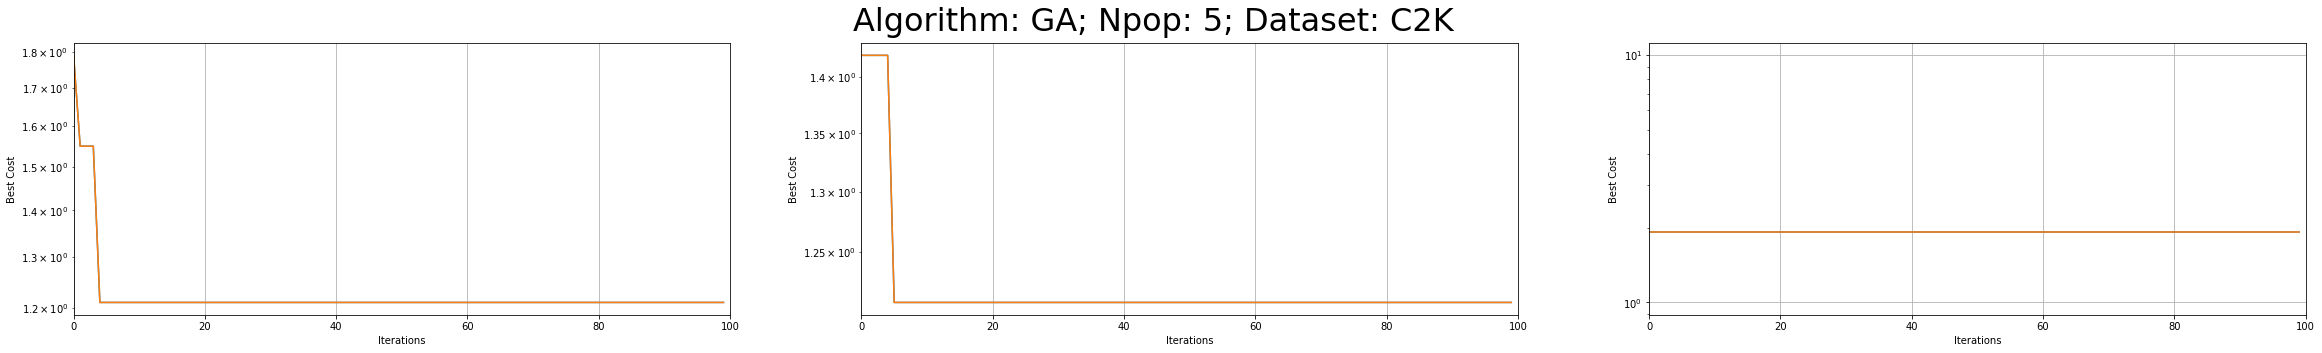

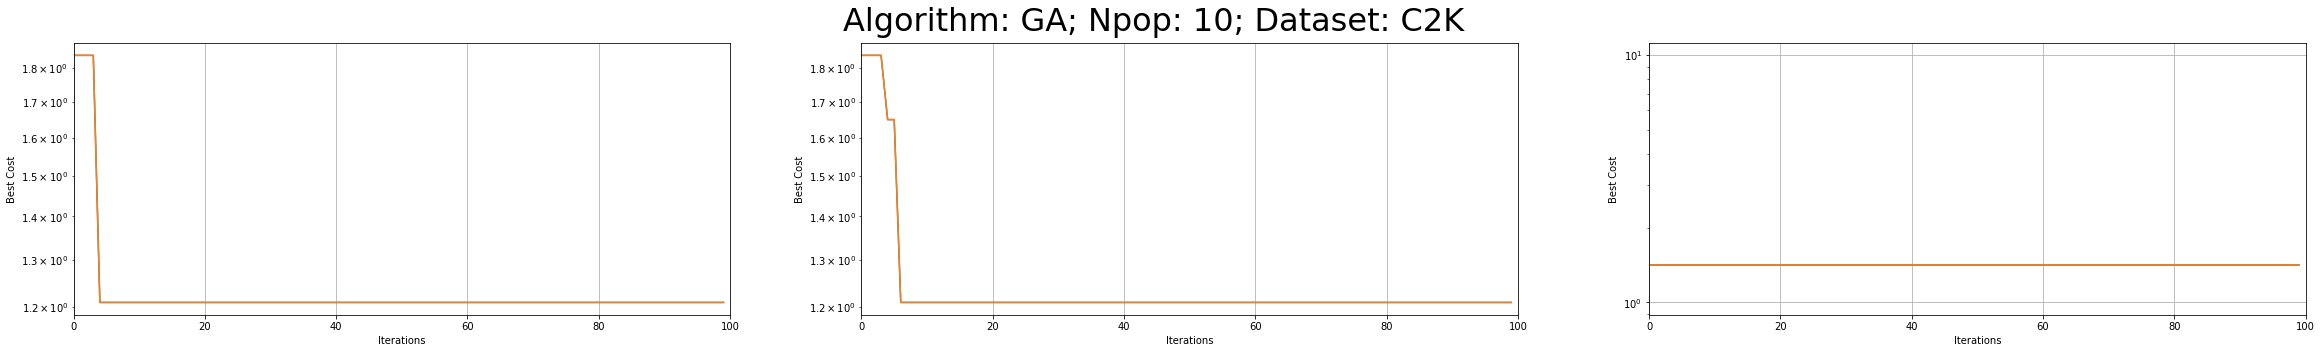

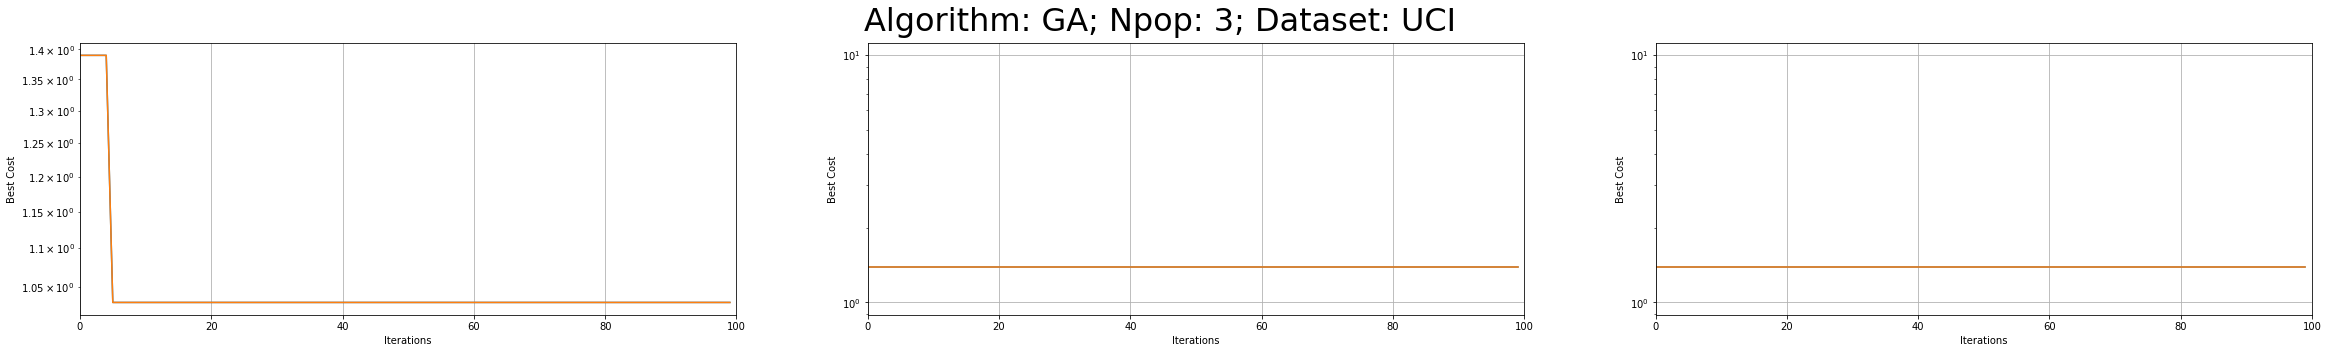

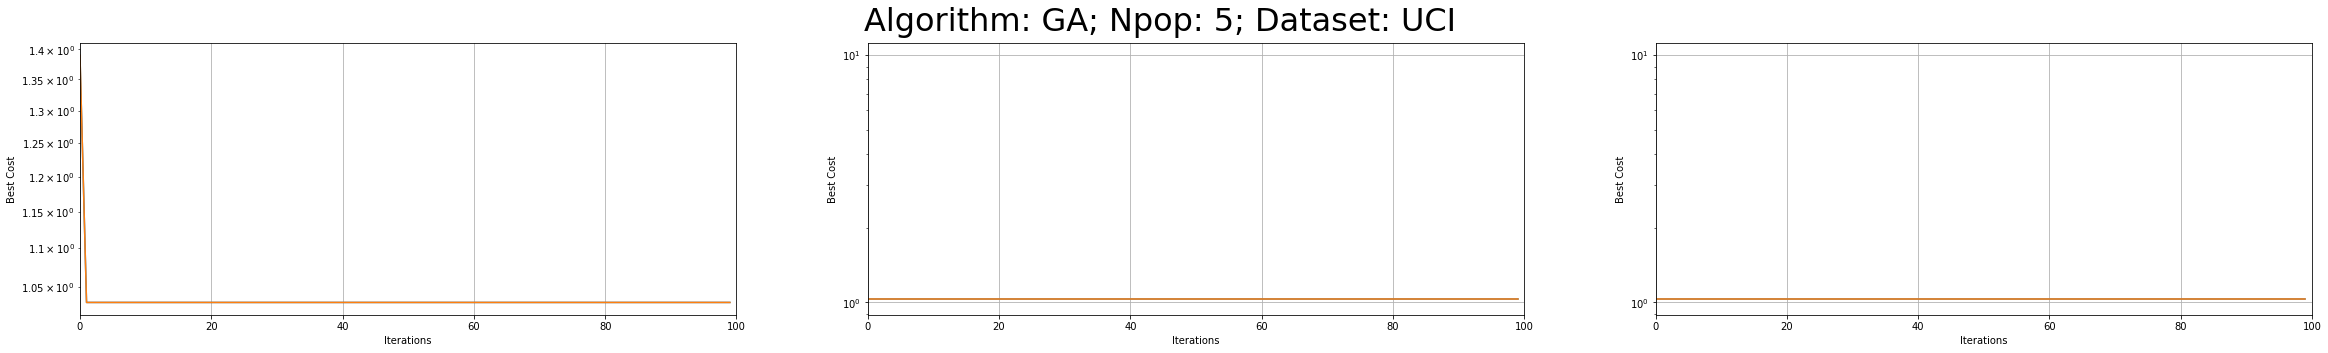

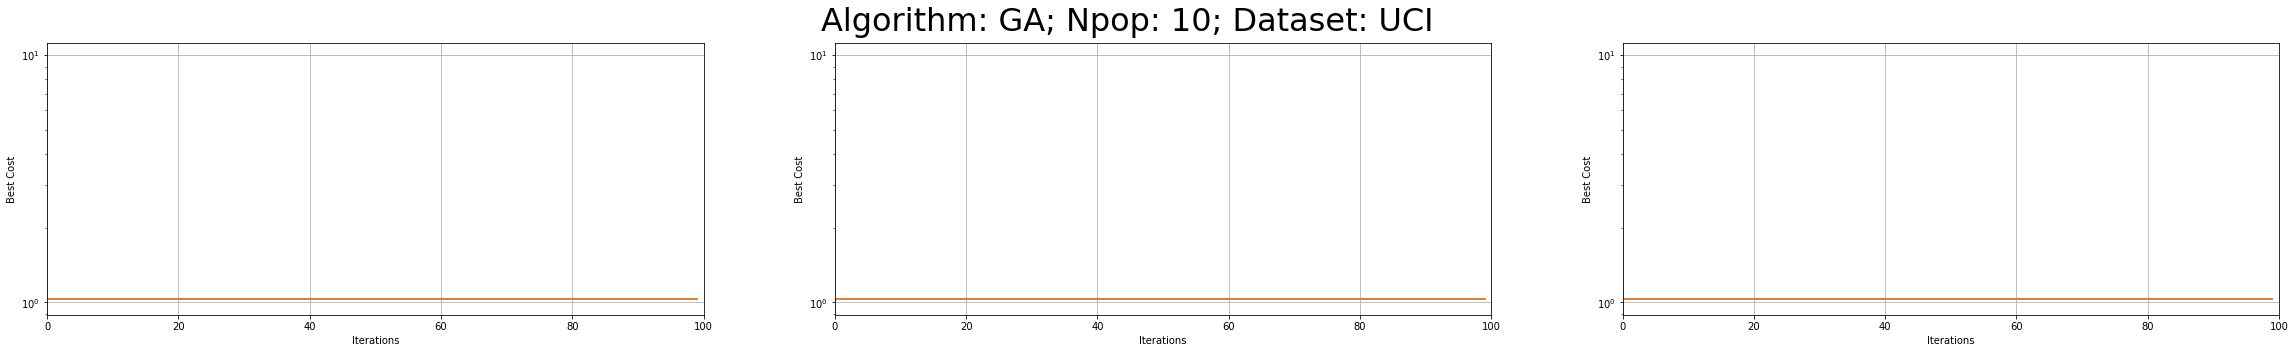

In [7]:
for ds in data_sets:
    df1 = df_ga.loc[df_ga['Data-set'] == ds]
    npop = [3, 5, 7, 10]
    npop = [3, 5, 10]  # TO BE REMOVED
    
    for n in npop:
        df2 = df1.loc[df1['N-pop'] == n]
    
        fig = plt.figure(figsize=(40,5))
        #fig = plt.figure()
        #axes = fig.subplots(nrows=1, ncols=4)
        i = 1
        for index,row in df2.iterrows():
            # Results
            plt.subplot(1, 3, i)
            plt.plot(row['Iterations'])
            plt.semilogy(row['Iterations'])
            plt.xlim(0, row['Max-iteration'])
            plt.xlabel('Iterations')
            plt.ylabel('Best Cost')
            #plt.title('ACO, Dataset: ' + ds)
            plt.grid(True)
            i += 1

        fig.suptitle('Algorithm: GA; Npop: ' + str(n) + '; Dataset: ' + ds, fontsize=32)
        plt.show()

ValueError: num must be 1 <= num <= 3, not 4

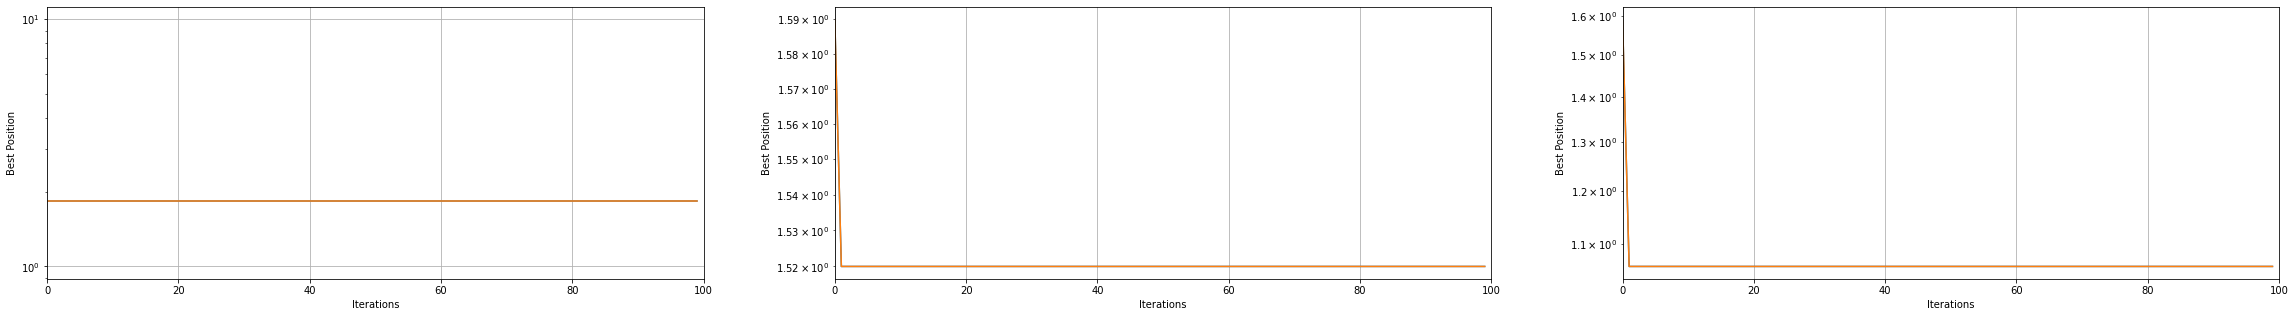

In [9]:
for ds in data_sets:
    df1 = df_pso.loc[df_pso['Data-set'] == ds]
    
    c2s = [0.1, 0.3, 0.5, 0.7, 0.9]
    c2s = [0.1, 0.3]  # TO BE REMOVED
    
    for c2 in c2s:
        df2 = df1.loc[df1['C2'] == c2]
    
        fig = plt.figure(figsize=(40,5))
        #fig = plt.figure()
        #axes = fig.subplots(nrows=1, ncols=4)
        i = 1
        for index,row in df.iterrows():
            # Results
            plt.subplot(1, 3, i)
            plt.plot(row['Iterations'])
            plt.semilogy(row['Iterations'])
            plt.xlim(0, row['Max-iteration'])
            plt.xlabel('Iterations')
            plt.ylabel('Best Position')
            #plt.title('ACO, Dataset: ' + ds)
            plt.grid(True)
            i += 1

        fig.suptitle('Algorithm: PSO; Nparticles: ' + str(row['N-particle']) + ';C1: ' + str(row['C1']) + ';C2: ' + str(row['C2']) + '; Dataset: ' + ds, fontsize=32)
        plt.show()